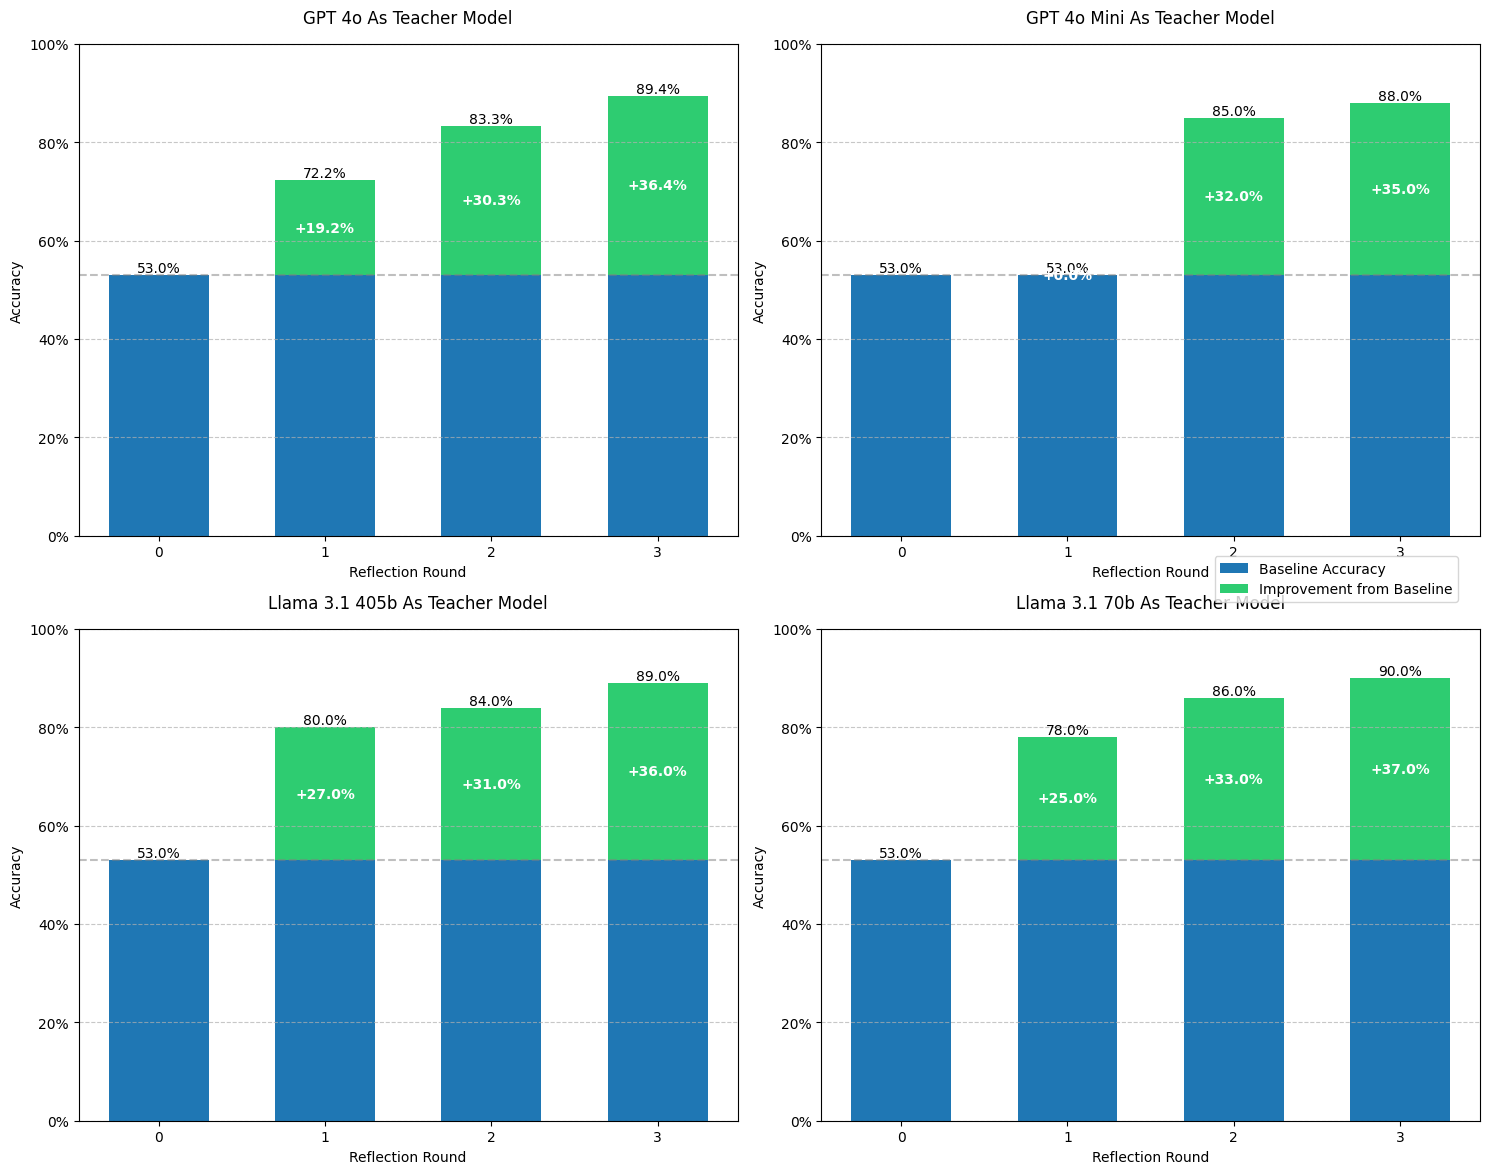

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data - replace with your actual accuracy values
data = {
    'GPT 4o': [0.5303, 0.7222, 0.8333, 0.8939],
    'GPT 4o Mini': [0.5303, 0.5303, 0.85, 0.88],
    'Llama 3.1 405b': [0.5303, 0.80, 0.84, 0.89],
    'Llama 3.1 70b': [0.5303, 0.78, 0.86, 0.90]
}


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('', fontsize=32, y=0.95)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Reflection rounds
rounds = [0, 1, 2, 3]

# Base color for the bars
base_color = '#1f77b4'  # A nice blue color
improvement_color = '#2ecc71'  # A nice green color

# Plot for each model
for idx, (model_name, accuracies) in enumerate(data.items()):
    baseline = accuracies[0]
    
    # Create base bars
    bars = axes[idx].bar(rounds, accuracies, width=0.6, color=base_color)
    
    # Add green portions for improvements
    for i, acc in enumerate(accuracies):
        if i > 0:  # Skip the baseline
            improvement = acc - baseline
            axes[idx].bar(i, improvement, width=0.6, 
                         bottom=baseline, color=improvement_color)
    
    # Add value labels on top of each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        axes[idx].text(
            bar.get_x() + bar.get_width()/2.,
            height,
            f'{height:.1%}',
            ha='center',
            va='bottom'
        )
        
        # Add improvement annotation for non-baseline bars
        if i > 0:
            improvement = height - baseline
            axes[idx].text(
                bar.get_x() + bar.get_width()/2.,
                baseline + improvement/2,
                f'+{improvement:.1%}',
                ha='center',
                va='center',
                color='white',
                fontweight='bold'
            )
    
    # Customize each subplot
    axes[idx].set_title(f'{model_name} As Teacher Model', pad=15)
    axes[idx].set_xlabel('Reflection Round')
    axes[idx].set_ylabel('Accuracy')
    axes[idx].grid(True, linestyle='--', alpha=0.7, axis='y')
    axes[idx].set_xticks(rounds)
    axes[idx].set_ylim(0.0, 1.0)  # Adjust based on your actual data range
    
    # Add percentage signs to y-axis
    axes[idx].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    # Add a horizontal line at baseline for visual reference
    axes[idx].axhline(y=baseline, color='gray', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Add legend
legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor=base_color, label='Baseline Accuracy'),
    plt.Rectangle((0,0),1,1, facecolor=improvement_color, label='Improvement from Baseline')
]
fig.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(0.98, 0.5))

# Show plot
plt.show()